##SPAM DETECTION 


In [ ]:
import pandas as pd
import numpy as np 
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.model_selection import cross_val_score
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification
from sklearn import metrics
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_curve, roc_auc_score
import matplotlib.pyplot as plt
import seaborn as sns




In [ ]:
# Load the spam dataset

spam_df = pd.read_csv('spam.csv', encoding='latin-1')
spam_df = spam_df[['Message', 'Category']]
spam_df.columns = ['text', 'label']

**PERFORM** **EDA**

In [ ]:
# Load the dataset
df = pd.read_csv('spam.csv', usecols=[0,1])
df = df.rename(columns={'Category': 'label', 'Message': 'text'})
df['label'] = df['label'].map({'ham': 0, 'spam': 1})

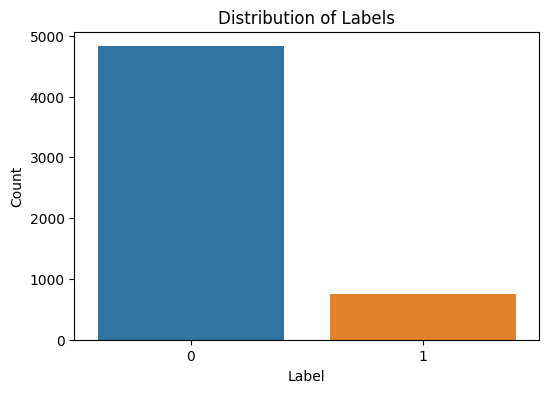

In [ ]:
# Plot the distribution of labels
plt.figure(figsize=(6,4))
sns.countplot(data=df, x='label')
plt.xlabel('Label')
plt.ylabel('Count')
plt.title('Distribution of Labels')
plt.show()

In [ ]:
# Calculate the length of each message
df['length'] = df['text'].apply(len)

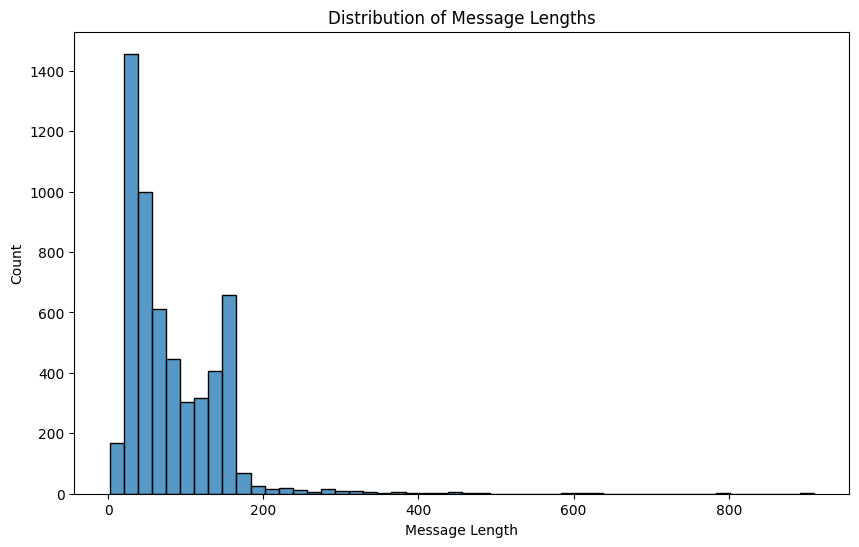

In [ ]:
# Plot the distribution of message lengths
plt.figure(figsize=(10,6))
sns.histplot(data=df, x='length', bins=50)
plt.xlabel('Message Length')
plt.ylabel('Count')
plt.title('Distribution of Message Lengths')
plt.show()

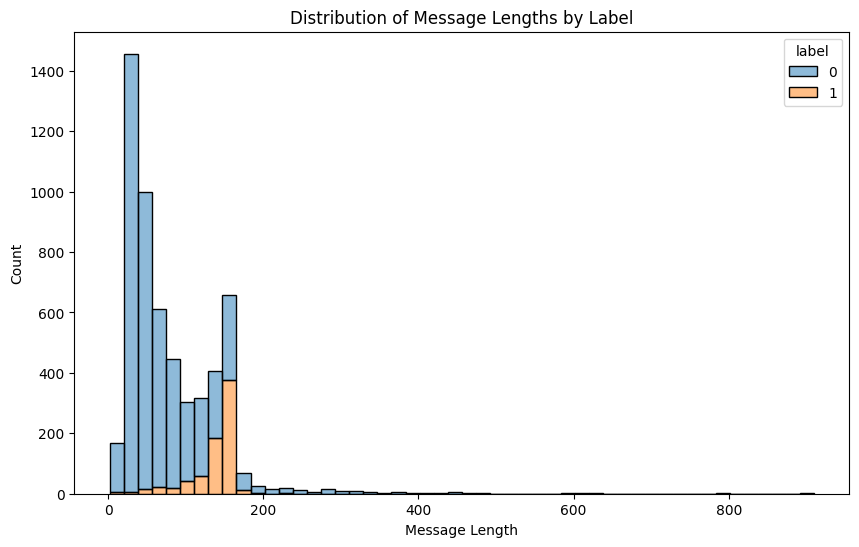

In [ ]:
# Plot the distribution of message lengths for each label
plt.figure(figsize=(10,6))
sns.histplot(data=df, x='length', bins=50, hue='label', alpha=0.5, multiple='stack')
plt.xlabel('Message Length')
plt.ylabel('Count')
plt.title('Distribution of Message Lengths by Label')
plt.show()

In [ ]:
# Calculate the number of words in each message
df['num_words'] = df['text'].apply(lambda x: len(x.split()))


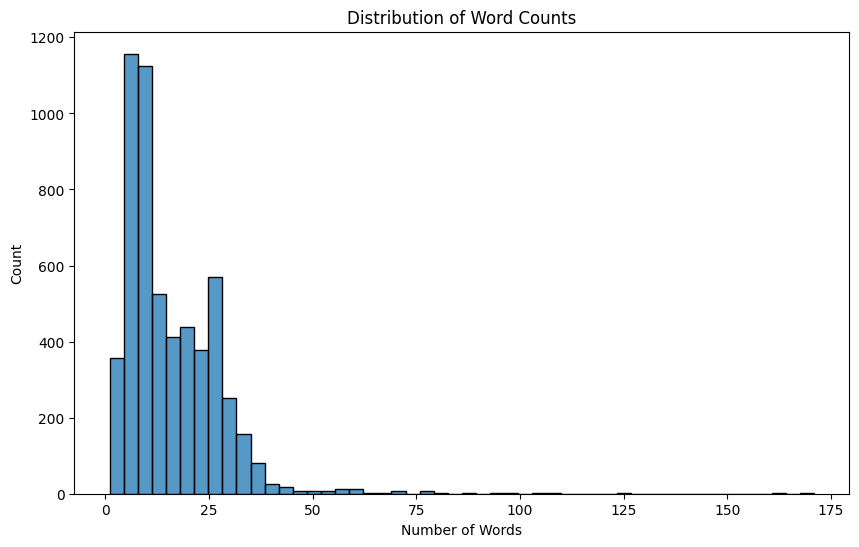

In [ ]:
# Plot the distribution of word counts
plt.figure(figsize=(10,6))
sns.histplot(data=df, x='num_words', bins=50)
plt.xlabel('Number of Words')
plt.ylabel('Count')
plt.title('Distribution of Word Counts')
plt.show()

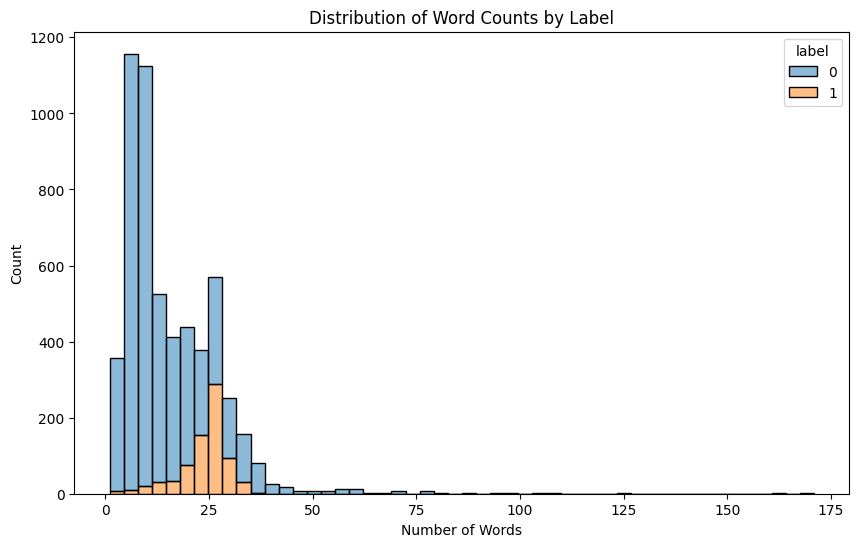

In [ ]:
# Plot the distribution of word counts for each label
plt.figure(figsize=(10,6))
sns.histplot(data=df, x='num_words', bins=50, hue='label', alpha=0.5, multiple='stack')
plt.xlabel('Number of Words')
plt.ylabel('Count')
plt.title('Distribution of Word Counts by Label')
plt.show()

**KNN** **ALGORITHM**

In [ ]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(spam_df['text'], spam_df['label'], random_state=42)


In [ ]:
# Vectorize the text data
from sklearn.feature_extraction.text import CountVectorizer
vect = CountVectorizer()
vect.fit(X_train)
X_train_vect = vect.transform(X_train)
X_test_vect = vect.transform(X_test)

In [ ]:
# Create a KNN classifier with k=5
knn = KNeighborsClassifier(n_neighbors=5)

In [ ]:
# Train the classifier
knn.fit(X_train_vect, y_train)


KNeighborsClassifier()

In [ ]:
# Make predictions on the test set
y_pred = knn.predict(X_test_vect)

# Evaluate the accuracy of the classifier
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.9246231155778895


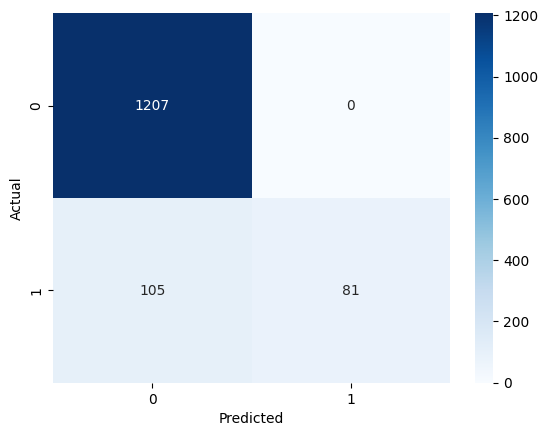

In [ ]:
# Generate confusion matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [ ]:
# Perform 10-fold cross-validation
scores = cross_val_score(knn, X_train_vect, y_train, cv=10)
print("Cross-validation scores:", scores)
print("Mean cross-validation score:", scores.mean())

Cross-validation scores: [0.90430622 0.91866029 0.9138756  0.91626794 0.91866029 0.90191388
 0.91866029 0.91626794 0.91148325 0.90167866]
Mean cross-validation score: 0.9121774350854244


In [ ]:
# Create a classification report
class_report = classification_report(y_test, y_pred)
print("Classification report:")
print(class_report)

Classification report:
              precision    recall  f1-score   support

         ham       0.92      1.00      0.96      1207
        spam       1.00      0.44      0.61       186

    accuracy                           0.92      1393
   macro avg       0.96      0.72      0.78      1393
weighted avg       0.93      0.92      0.91      1393



**SUPPORT** **VECTOR** **MACHINE** (**SVM**)

In [ ]:

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(spam_df['text'], spam_df['label'], random_state=42)

# Vectorize the text data
vect = CountVectorizer()
vect.fit(X_train)
X_train_vect = vect.transform(X_train)
X_test_vect = vect.transform(X_test)


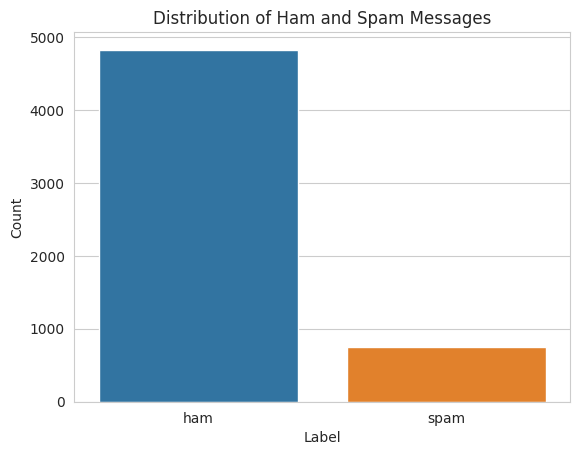

In [ ]:
# Plot the distribution of ham and spam messages
sns.set_style('whitegrid')
sns.countplot(x='label', data=spam_df)
plt.xlabel('Label')
plt.ylabel('Count')
plt.title('Distribution of Ham and Spam Messages')
plt.show()

In [ ]:
# Create an SVM classifier with a linear kernel
svm = SVC(kernel='linear')

# Train the classifier
svm.fit(X_train_vect, y_train)

# Make predictions on the test set
y_pred = svm.predict(X_test_vect)

In [ ]:
# Evaluate the accuracy of the classifier
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)


Accuracy: 0.9849246231155779


In [ ]:
# Create a confusion matrix
conf_mat = confusion_matrix(y_test, y_pred)
print("Confusion matrix:")
print(conf_mat)

Confusion matrix:
[[1207    0]
 [  21  165]]


In [ ]:
# Create a classification report
class_report = classification_report(y_test, y_pred)
print("Classification report:")
print(class_report)

Classification report:
              precision    recall  f1-score   support

         ham       0.98      1.00      0.99      1207
        spam       1.00      0.89      0.94       186

    accuracy                           0.98      1393
   macro avg       0.99      0.94      0.97      1393
weighted avg       0.99      0.98      0.98      1393



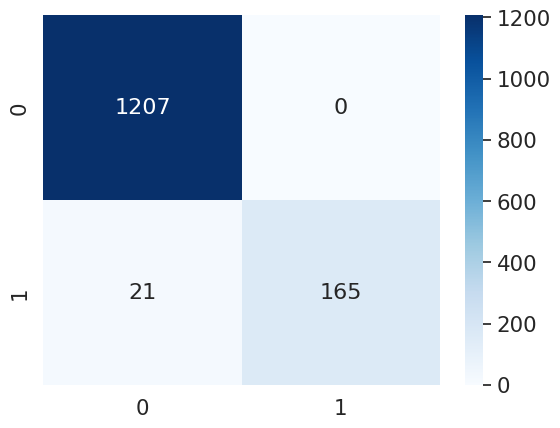

In [ ]:

# Plot the confusion matrix
sns.set(font_scale=1.4)
sns.heatmap(conf_mat, annot=True, annot_kws={"size": 16}, cmap='Blues', fmt='g')
plt.show()

NAIVE BAYES

In [ ]:
!pip install -U scikit-learn


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_curve, roc_auc_score
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# Load the dataset
df = pd.read_csv('spam.csv', usecols=[0,1])
df = df.rename(columns={'Category': 'label', 'Message': 'text'})
df['label'] = df['label'].map({'ham': 0, 'spam': 1})

In [ ]:

# Split the dataset into training and testing sets
train_df = df.sample(frac=0.8, random_state=42)
test_df = df.drop(train_df.index)

In [ ]:
# Vectorize the text data
vectorizer = CountVectorizer(stop_words='english')
X_train = vectorizer.fit_transform(train_df['text'])
X_test = vectorizer.transform(test_df['text'])
y_train = train_df['label']
y_test = test_df['label']

In [ ]:
# Train the Naive Bayes model
nb = MultinomialNB()
nb.fit(X_train, y_train)

MultinomialNB()

In [ ]:

# Make predictions on the test data
y_pred = nb.predict(X_test)


In [ ]:
# Calculate evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
confusion_mat = confusion_matrix(y_test, y_pred)

print('Accuracy:', accuracy)
print('Precision:', precision)
print('Recall:', recall)
print('F1 Score:', f1)
print('Confusion Matrix:\n', confusion_mat)

Accuracy: 0.9829443447037702
Precision: 0.9655172413793104
Recall: 0.9090909090909091
F1 Score: 0.9364548494983278
Confusion Matrix:
 [[955   5]
 [ 14 140]]


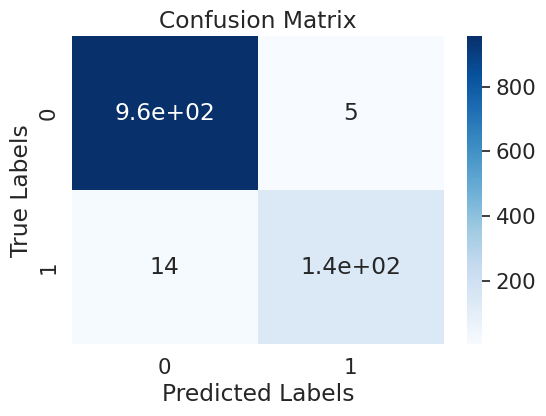

In [ ]:
# Plot confusion matrix
plt.figure(figsize=(6, 4))
sns.heatmap(confusion_mat, annot=True, cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

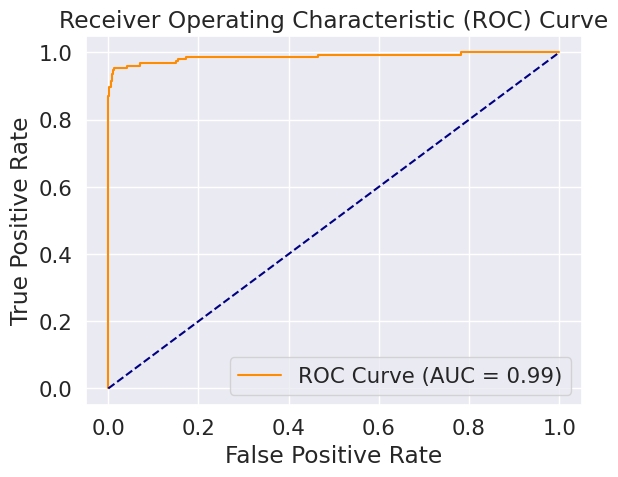

In [ ]:
# Plot ROC curve
y_pred_prob = nb.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
auc_score = roc_auc_score(y_test, y_pred_prob)

plt.plot(fpr, tpr, color='darkorange', label=f'ROC Curve (AUC = {auc_score:.2f})')
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

RANDOM FOREST 

In [ ]:
df = pd.read_csv("spam.csv")

In [ ]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(spam_df['text'], spam_df['label'], random_state=42)


In [ ]:
# Vectorize the text data
vect = CountVectorizer()
vect.fit(X_train)
X_train_vect = vect.transform(X_train)
X_test_vect = vect.transform(X_test)

# Convert the labels to binary values
y_train = y_train.map({'ham': 0, 'spam': 1})
y_test = y_test.map({'ham': 0, 'spam': 1})

# Convert the sparse matrices to dense arrays
X_train_array = X_train_vect.toarray()
X_test_array = X_test_vect.toarray()

In [ ]:
# Print the arrays
print("X_train_array:")
print(X_train_array)
print("y_train:")
print(y_train)

X_train_array:
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
y_train:
4281    1
585     0
4545    0
3034    0
2758    0
       ..
3772    0
5191    0
5226    0
5390    0
860     0
Name: label, Length: 4179, dtype: int64


In [ ]:
print(y_test)

3245    0
944     0
1044    0
2484    0
812     0
       ..
668     0
218     0
5536    0
1657    0
3875    0
Name: label, Length: 1393, dtype: int64


In [ ]:
# Create a Random Forest classifier
rfc = RandomForestClassifier(n_estimators=100, random_state=42)

In [ ]:
# Train the classifier
rfc.fit(X_train_vect, y_train)

RandomForestClassifier(random_state=42)

In [ ]:
# Make predictions on the test set
y_pred = rfc.predict(X_test_vect)

In [ ]:
# Evaluate the accuracy of the classifier
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)


Accuracy: 0.9777458722182341


In [ ]:
# Create a confusion matrix
conf_mat = confusion_matrix(y_test, y_pred)
print("Confusion matrix:")
print(conf_mat)

Confusion matrix:
[[1207    0]
 [  31  155]]


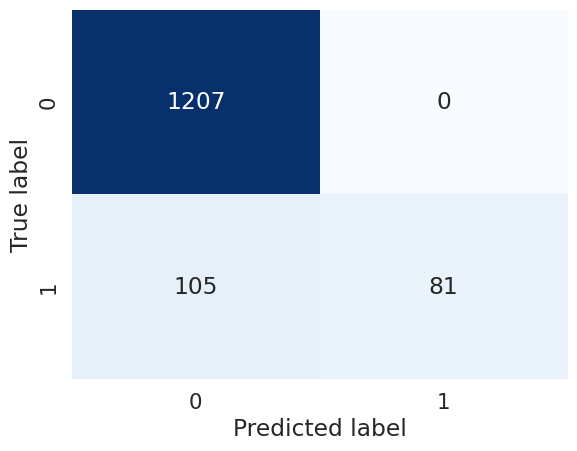

In [ ]:
# Plot the confusion matrix
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g', cbar=False)
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.show()

In [ ]:
# Create a classification report
class_report = classification_report(y_test, y_pred)
print("Classification report:")
print(class_report)

Classification report:
              precision    recall  f1-score   support

           0       0.97      1.00      0.99      1207
           1       1.00      0.83      0.91       186

    accuracy                           0.98      1393
   macro avg       0.99      0.92      0.95      1393
weighted avg       0.98      0.98      0.98      1393



In [ ]:
rfc.apply(X_train_array)

array([[643, 678, 592, ..., 794, 415, 750],
       [352, 156, 260, ..., 360, 117, 418],
       [313, 149, 247, ..., 299, 101, 395],
       ...,
       [247, 102, 182, ..., 196, 101, 355],
       [228, 102, 179, ..., 192, 101, 234],
       [259, 250, 250, ..., 257, 101, 416]])

In [ ]:
rfc.decision_path(X_train_array)

(<4179x75584 sparse matrix of type '<class 'numpy.int64'>'
 	with 31288445 stored elements in Compressed Sparse Row format>,
 array([    0,   741,  1468,  2229,  2864,  3435,  4274,  4919,  5632,
         6217,  6818,  7619,  8500,  9185,  9932, 10881, 11566, 12109,
        12736, 13329, 14270, 15127, 15884, 16553, 17490, 18089, 18904,
        19587, 20540, 21475, 22422, 23047, 23810, 24379, 25222, 26243,
        26830, 27569, 28428, 29165, 30136, 30733, 31352, 31985, 32680,
        33735, 34412, 35175, 35828, 36447, 37498, 38243, 39170, 39973,
        40674, 41335, 41954, 42759, 43446, 44089, 45016, 45639, 46392,
        47271, 48098, 49115, 49754, 50463, 51064, 51935, 52604, 53385,
        53998, 54555, 55362, 56247, 56850, 57817, 58530, 59477, 60460,
        61237, 62142, 63061, 63958, 64519, 65280, 65789, 66466, 67345,
        68006, 68751, 69742, 70271, 71086, 71599, 72464, 73223, 74042,
        74673, 75584]))

In [ ]:
rfc.get_params(deep=True)

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 42,
 'verbose': 0,
 'warm_start': False}

**RNN** 

In [ ]:
!pip install tensorflow

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
!pip install keras

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer

from keras.preprocessing.text import Tokenizer
#from keras.preprocessing.sequence import pad_sequences
from keras.utils import pad_sequences
from keras.utils.data_utils import pad_sequences
import tensorflow as tf
from keras.layers import Dense

from keras.models import Sequential
from keras.layers import Dense, LSTM, Embedding

In [ ]:
df = pd.read_csv('spam.csv')
df.head()

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [ ]:
df['target'] = df['Category'].map( {'spam':1, 'ham':0 })

In [ ]:
## b) Trainings- und Testdaten separieren
df_train = df.sample(frac=.8, random_state=11)
df_test = df.drop(df_train.index)
print(df_train.shape, df_test.shape)

(4458, 3) (1114, 3)


In [ ]:
y_train = df_train['target'].values
y_test = df_test['target'].values
y_test.shape

(1114,)

In [ ]:
X_train = df_train['Message'].values
X_test = df_test['Message'].values

In [ ]:
tokenizer = Tokenizer()
tokenizer.fit_on_texts(X_train)
word_dict = tokenizer.index_word
#print(len(word_dict))
#print(word_dict)

#for key in word_dict.keys():
#    print(key, word_dict[key])

In [ ]:
X_train_seq = tokenizer.texts_to_sequences(X_train)
X_test_seq = tokenizer.texts_to_sequences(X_test)
print(X_train_seq[:5])
print(df_train.iloc[0,:])
for el in X_train_seq[0]:
    print(word_dict[el], end=' ')

[[667, 2, 233, 93, 640, 40, 132, 9, 51, 1252, 3, 51, 571, 2, 3823, 1020, 3824, 2596, 26, 188, 1427, 2, 1253, 69, 50, 86, 2, 3825], [1, 2016, 121, 404, 20, 157, 6, 3826, 19, 484, 1, 169, 322, 376, 6, 668, 170, 2017], [405, 74, 164, 4, 264, 15, 11, 2018], [51, 146, 2597, 30, 5, 938, 3827, 1121, 22, 12, 641, 71, 3828, 12, 356, 71, 3829, 2, 2598, 274, 938, 606, 12, 36, 154, 2019, 118, 260, 65, 189, 642, 377], [31, 3, 104, 1, 27, 807, 45, 43, 8, 4, 118]]
Category                                                 spam
Message     Welcome to UK-mobile-date this msg is FREE giv...
target                                                      1
Name: 4460, dtype: object
welcome to uk mobile date this msg is free giving you free calling to 08719839835 future mgs billed at 150p daily to cancel send go stop to 89123 

In [ ]:
X_train_pad = pad_sequences(X_train_seq, maxlen=20, padding='post')
X_test_pad = pad_sequences(X_test_seq, maxlen=20, padding='post')
X_train_pad[:5]
X_train_pad.shape

(4458, 20)

In [ ]:
laenge_pads = 20
anz_woerter = 7982

lstm_model = Sequential()
lstm_model.add(Embedding(input_dim=anz_woerter+1, output_dim=20, input_length=laenge_pads))
lstm_model.add(LSTM(400))
lstm_model.add(Dense(1, activation='sigmoid'))

lstm_model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
lstm_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 20, 20)            159660    
                                                                 
 lstm (LSTM)                 (None, 400)               673600    
                                                                 
 dense (Dense)               (None, 1)                 401       
                                                                 
Total params: 833,661
Trainable params: 833,661
Non-trainable params: 0
_________________________________________________________________


In [ ]:
history = lstm_model.fit(X_train_pad, y_train, epochs=10, batch_size=64, 
                        validation_data=(X_test_pad, y_test))

Epoch 1/10
70/70 [==============================] - 17s 205ms/step - loss: 0.1932 - accuracy: 0.9275 - val_loss: 0.0873 - val_accuracy: 0.9731
Epoch 2/10
70/70 [==============================] - 15s 220ms/step - loss: 0.0389 - accuracy: 0.9906 - val_loss: 0.1127 - val_accuracy: 0.9722
Epoch 3/10
70/70 [==============================] - 14s 202ms/step - loss: 0.0223 - accuracy: 0.9957 - val_loss: 0.1036 - val_accuracy: 0.9722
Epoch 4/10
70/70 [==============================] - 14s 202ms/step - loss: 0.0222 - accuracy: 0.9962 - val_loss: 0.1307 - val_accuracy: 0.9686
Epoch 5/10
70/70 [==============================] - 15s 216ms/step - loss: 0.0055 - accuracy: 0.9989 - val_loss: 0.1485 - val_accuracy: 0.9704
Epoch 6/10
70/70 [==============================] - 14s 204ms/step - loss: 0.0037 - accuracy: 0.9989 - val_loss: 0.1342 - val_accuracy: 0.9731
Epoch 7/10
70/70 [==============================] - 14s 203ms/step - loss: 4.7828e-04 - accuracy: 0.9998 - val_loss: 0.3554 - val_accuracy: 0.

In [ ]:
sms_test = ['Hi Paul, would you come around tonight']
sms_seq = tokenizer.texts_to_sequences(sms_test)
sms_pad = pad_sequences(sms_seq, maxlen=20, padding='post')
# Use the predict() method to obtain the model's output probabilities
predictions=(lstm_model.predict(sms_pad) > 0.5).astype("int32")

# Print the predicted class label
print("Predicted class label:", predictions)


1/1 [==============================] - 0s 470ms/step
Predicted class label: [[0]]


In [ ]:
sms_test = ['You are eligible for the loan now please click the below link to fill the form']
sms_seq = tokenizer.texts_to_sequences(sms_test)
sms_pad = pad_sequences(sms_seq, maxlen=20, padding='post')

# Use the predict() method to obtain the model's output probabilities
predictions=(lstm_model.predict(sms_pad) > 0.5).astype("int32")

# Print the predicted class label
print("Predicted class label:", predictions)

1/1 [==============================] - 0s 27ms/step
Predicted class label: [[0]]
